## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [56]:
your_name = "Prasiddha Acharya"
your_student_id = "47697652"

In [58]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')
car_sell_df = pd.read_csv('car_sell.csv')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [61]:
print(car_sell_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4340 non-null   int64  
 1   name           4340 non-null   object 
 2   year           4030 non-null   float64
 3   selling_price  4340 non-null   int64  
 4   km_driven      4340 non-null   int64  
 5   fuel           4340 non-null   object 
 6   seller_type    4340 non-null   object 
 7   transmission   4340 non-null   object 
 8   owner          4340 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB
None


In [63]:
new_car_sell_df = car_sell_df.dropna(subset =['year'])
#removing'year' and 'fuel' missing records

cleaned_car_sell_df = cleaned_car_sell_df[cleaned_car_sell_df['fuel'] != 'none']

In [65]:
print(new_car_sell_df.info())
#Taking cleaned dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 4030 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4030 non-null   int64  
 1   name           4030 non-null   object 
 2   year           4030 non-null   float64
 3   selling_price  4030 non-null   int64  
 4   km_driven      4030 non-null   int64  
 5   fuel           4030 non-null   object 
 6   seller_type    4030 non-null   object 
 7   transmission   4030 non-null   object 
 8   owner          4030 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 314.8+ KB
None


In [67]:
print(f"\nInitial number of rows: {len(car_sell_df)}")


Initial number of rows: 4340


In [69]:
print(f"Cleaned number of rows: {len(cleaned_car_sell_df)}")

Cleaned number of rows: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [71]:
unique_name_count = cleaned_car_sell_df['name'].nunique()
#counting the total number of unique name

unique_seller_type_count = cleaned_car_sell_df['seller_type'].nunique()
#counting the total number of unique seller_type

unique_transmission_count = cleaned_car_sell_df['transmission'].nunique()
#counting the total number of unique transmission

unique_owner_count = cleaned_car_sell_df['owner'].nunique()
#counting the total number of unique owner

In [73]:
print(f"Unique car names: {unique_name_count}")
#printing no of unique car names 

Unique car names: 1402


In [75]:
print(f"Unique seller type: {unique_seller_type_count}")
#printing no of unique seller type

Unique seller type: 3


In [80]:
print(f"Unique transmission types: {unique_transmission_count}")
#printing no of unique transmission types

Unique transmission types: 2


In [83]:
print(f"Unique owner types: {unique_owner_count}")

Unique owner types: 5


In [87]:
km_driven_stats = cleaned_car_sell_df['km_driven'].describe()

In [92]:
print("\nDescriptive statistics for 'km_driven':")
print(km_driven_stats)


Descriptive statistics for 'km_driven':
count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


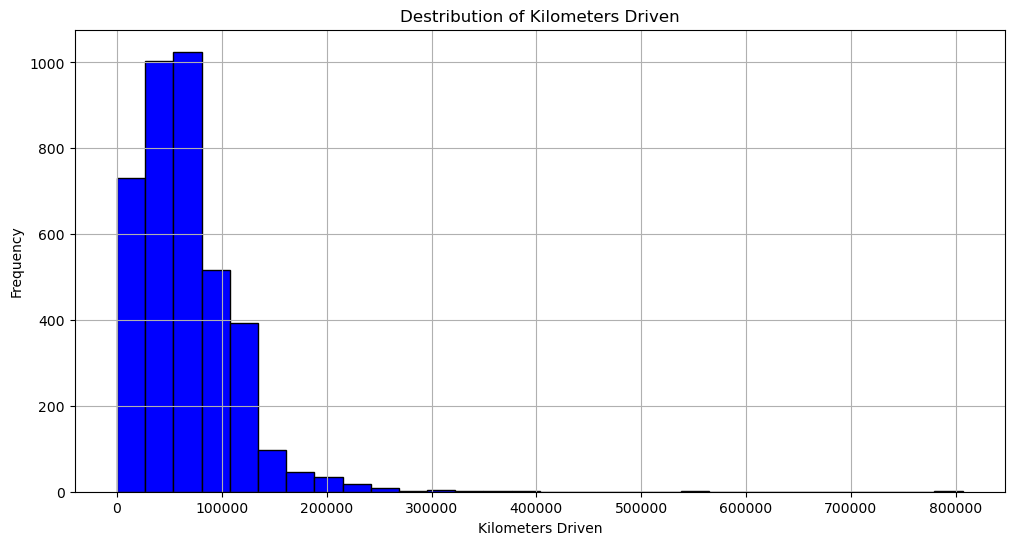

In [124]:
plt.figure(figsize=(12, 6))
plt.hist(cleaned_car_sell_df['km_driven'], bins=30, color ='blue', edgecolor='black')
plt.title('Destribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [120]:
selling_price_stats_by_seller_type = cleaned_car_sell_df.groupby('seller_type')['selling_price'].describe()


In [122]:
print(selling_price_stats_by_seller_type)
#showing the descriptive statistics

                   count           mean            std       min       25%  \
seller_type                                                                  
Dealer             889.0  702093.314961  813597.811832   22000.0  300000.0   
Individual        2903.0  421169.410265  420273.684129   20000.0  170000.0   
Trustmark Dealer    94.0  935797.872340  655724.299195  315000.0  625000.0   

                       50%       75%        max  
seller_type                                      
Dealer            490000.0  746000.0  8900000.0  
Individual        300000.0  540000.0  4800000.0  
Trustmark Dealer  750000.0  760000.0  2600000.0  


<Figure size 1200x600 with 0 Axes>

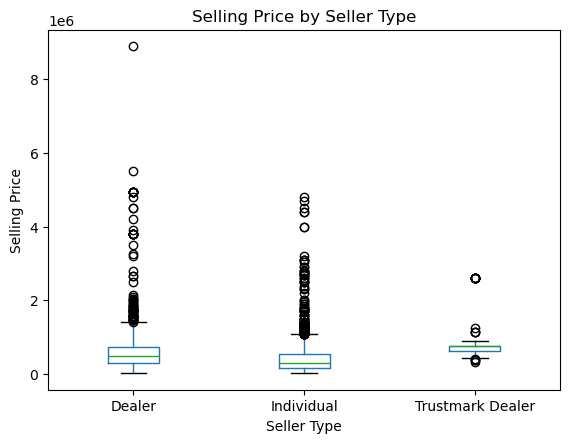

In [128]:
plt.figure(figsize=(12, 6))
cleaned_car_sell_df.boxplot(column='selling_price', by='seller_type', grid=False)
plt.title('Selling Price by Seller Type')
plt.suptitle('')  
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

In [143]:
cleaned_car_sell_df['car_age'] = 2024 - cleaned_car_sell_df['year']
#Adding a new column named car_age for the age of the car

car_age_stats_by_owner = cleaned_car_sell_df.groupby('owner')['car_age']. describe()


In [145]:
print(car_age_stats_by_owner)

                       count       mean       std  min   25%   50%    75%  \
owner                                                                       
First Owner           2532.0   9.546209  3.555597  4.0   7.0   9.0  12.00   
Fourth & Above Owner    67.0  16.761194  5.248635  4.0  13.5  16.0  20.00   
Second Owner          1000.0  13.023000  3.840993  5.0  10.0  12.5  15.00   
Test Drive Car          14.0   4.357143  0.633324  4.0   4.0   4.0   4.75   
Third Owner            273.0  14.586081  3.920266  5.0  12.0  14.0  17.00   

                       max  
owner                       
First Owner           28.0  
Fourth & Above Owner  32.0  
Second Owner          29.0  
Test Drive Car         6.0  
Third Owner           27.0  


<Figure size 1000x600 with 0 Axes>

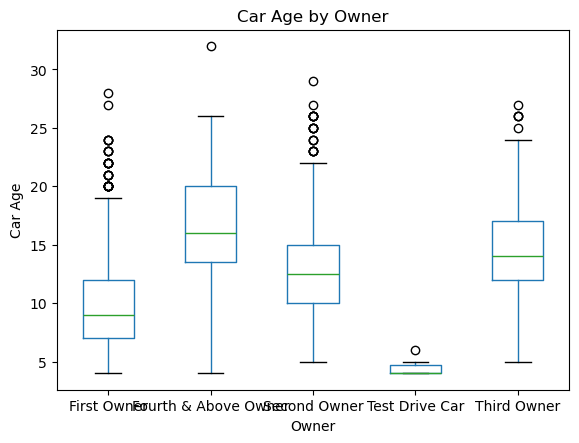

In [163]:
plt.figure(figsize = (10,6))
cleaned_car_sell_df.boxplot(column='car_age', by= 'owner', grid=False)
plt.title('Car Age by Owner')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Car Age')
plt.show()

## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.